In [60]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [61]:
#import data
data = pd.read_csv('test2.csv')

In [62]:
#check null value in each coloum
print(data.isnull().sum())

number             0
Popularity         0
Vote Count         0
Title              0
Released Period    0
Type               0
Leading Cast       0
Vote Average       0
Overview           0
dtype: int64


In [63]:
#check top 100 rows of data
data.head(100)

,number,Popularity,Vote Count,Title,Released Period,Type,Leading Cast,Vote Average,Overview
0,1,13.939,899,Across the Universe,13,1,0,7.2,When young dockworker Jude leaves Liverpool to...
1,2,16.389,261,Acts of Vengeance,3,3,0,5.8,A fast-talking lawyer transforms his body and ...
2,3,11.401,637,Adore,7,4,0,6.1,"Lil and Roz are two lifelong friends, having g..."
3,4,31.359,2674,After,1,1,0,6.1,"Tessa Young is a dedicated student, dutiful da..."
4,5,10.956,149,After Porn Ends,8,3,0,5.5,Documentary examining what happens to some of ...
...,...,...,...,...,...,...,...,...,...
95,96,11.151,149,Bo Burnham: Make Happy,4,3,0,8.4,Combining his trademark wit and self-deprecati...
96,97,11.223,168,Bokeh,3,1,0,5.4,"On a romantic getaway to Iceland, a young Amer..."
97,98,18.475,3913,Bolt,12,2,0,6.4,Bolt is the star of the biggest show in Hollyw...
98,99,57.518,655,Bombshell,1,2,0,6.8,Bombshell is a revealing look inside the most ...


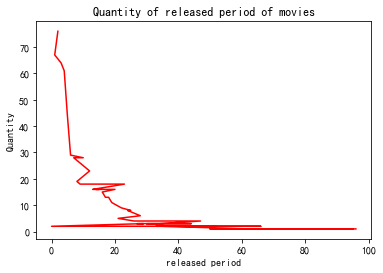

In [64]:
#line chart  number of movies released each year
dict = data['Released Period'].value_counts().to_dict()
#dict 
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
y = list(dict.values())
x = list(dict.keys())
plt.plot(x, y, "r")
plt.xlabel("released period")
plt.ylabel("Quantity")
plt.title("Quantity of released period of movies")
plt.show()

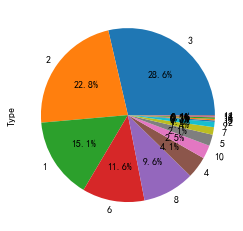

In [65]:
#pie chart------Type
data['Type'].value_counts().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')


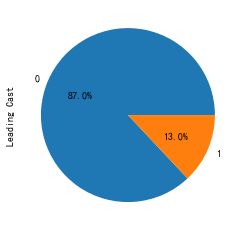

In [66]:
#pie chart------Leading Cast
data['Leading Cast'].value_counts().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%')

In [67]:
#Linear Regression
from pandas import read_csv
import numpy as np
dataset = read_csv('test2.csv', header=0)
print(dataset.isnull().sum())

number             0
Popularity         0
Vote Count         0
Title              0
Released Period    0
Type               0
Leading Cast       0
Vote Average       0
Overview           0
dtype: int64


In [68]:
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

number             0
Popularity         0
Vote Count         0
Title              0
Released Period    0
Type               0
Leading Cast       0
Vote Average       0
Overview           0
dtype: int64


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [70]:
x = dataset.loc[:,('Vote Count','Popularity','Released Period','Type','Leading Cast')]
y = dataset.loc[:,'Vote Average']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [71]:
linreg = LinearRegression()
model=linreg.fit(x_train,y_train)
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [72]:
print (linreg.intercept_)
print (linreg.coef_)

5.960590138337773
[0.0001751  0.00018495 0.01542602 0.00148884 0.05131418]


In [73]:
feature_cols = ['Vote Count','Popularity','Released Period','Type','Leading Cast']
B=list(zip(feature_cols,linreg.coef_))
print(B)

[('Vote Count', 0.00017509925476172274), ('Popularity', 0.0001849479148235201), ('Released Period', 0.015426019628179763), ('Type', 0.001488840874313921), ('Leading Cast', 0.05131417832352119)]


In [74]:
y_pred = linreg.predict(x_test)
print (y_pred)

[6.35918065 6.08428018 6.07629394 6.98001237 5.99344869 6.6702507
 6.76219304 7.02704013 6.07407093 6.11315058 7.15656238 9.53403179
 6.66525782 6.54765962 6.42068504 7.36554102 6.07262973 6.0848986
 5.99929677 6.36271728 6.22316721 6.14879254 6.28265292 6.70145715
 6.22298097 6.47293649 8.86265158 6.10289159 6.61302645 6.10701546
 6.63327561 6.01799972 6.40148299 6.23974856 6.42905117 6.39572177
 7.12187756 6.00836535 6.07909494 6.23565351 6.13921521 6.07315074
 6.07692984 6.49976827 6.10178851 6.05125918 6.7065279  6.05000191
 6.43856447 6.28476795 5.99695054 6.08616367 7.02860801 6.75494376
 6.11370674 6.80758753 6.11316767 6.8039351  6.00219162 6.94871089
 6.4689039  6.94479641 6.12469264 6.72792887 6.07704412 6.76329219
 6.2101554  6.13016144 6.48283189 6.26492466 6.02283405 6.38984156
 6.33304338 6.13476838 6.91526396 6.15969466 6.11392309 6.18001292
 6.37410415 7.32299038 5.99600175 6.04151036 6.16642325 6.65966084
 7.07553985 6.05234467 7.63538113 6.56181404 6.25290544 6.231551

In [75]:
print(np.array(x_test).shape)

(215, 5)


In [76]:
print("MSE:",metrics.mean_squared_error(y_test, y_pred))

MSE: 1.0115207808423208


In [77]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 1.0057438942605224


In [78]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, x, y, cv=10)
print("MSE:", metrics.mean_squared_error(y, predicted))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 0.7576954642930694
RMSE: 0.8704570433358957


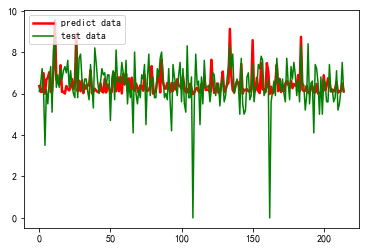

In [79]:
plt.plot(range(len(y_pred)),y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(y_test)),y_test,'green',label="test data")
plt.legend(loc=2)
plt.show()

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()

from sklearn.metrics import mean_squared_error, r2_score
from pandas import read_csv

dataset = read_csv('test2.csv', header=0)
print(dataset.isnull().sum())

number             0
Popularity         0
Vote Count         0
Title              0
Released Period    0
Type               0
Leading Cast       0
Vote Average       0
Overview           0
dtype: int64


In [81]:
dataset.fillna(dataset.mean(), inplace=True)
print(dataset.isnull().sum())

number             0
Popularity         0
Vote Count         0
Title              0
Released Period    0
Type               0
Leading Cast       0
Vote Average       0
Overview           0
dtype: int64


In [82]:
print(dataset.mean())

number              358.500000
Popularity           13.943874
Vote Count         1335.621508
Released Period      11.660615
Type                  3.808659
Leading Cast          0.129888
Vote Average          6.386453
dtype: float64


In [83]:
dataset["Vote Average"] = np.where(dataset["Vote Average"] < 6.404342, "0", "1")

In [84]:
x = dataset.loc[:,('Vote Count','Popularity','Released Period','Type','Leading Cast')]
y = dataset.loc[:,'Vote Average']

In [85]:
print(x)
print(y)

     Vote Count  Popularity  Released Period  Type  Leading Cast
0           899      13.939               13     1             0
1           261      16.389                3     3             0
2           637      11.401                7     4             0
3          2674      31.359                1     1             0
4           149      10.956                8     3             0
..          ...         ...              ...   ...           ...
711         448      12.605                4     1             0
712        1026      10.714                6     2             1
713         160      11.100               12     3             1
714         593      16.156                1     3             0
715         180       6.422               57     3             0

[716 rows x 5 columns]
0      1
1      0
2      0
3      0
4      0
      ..
711    1
712    0
713    0
714    0
715    1
Name: Vote Average, Length: 716, dtype: object


In [86]:
dataset.keys()

Index(['number', 'Popularity', 'Vote Count', 'Title', 'Released Period',
       'Type', 'Leading Cast', 'Vote Average', 'Overview'],
      dtype='object')

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=1)

In [88]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array(['0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0',
       '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [90]:
accuracy_score(y_test,y_pred)

0.6341463414634146

In [91]:
#Decision tree regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

import numpy as np
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from pandas import read_csv
movie = read_csv('test2.csv')
movie = movie.replace(np.NaN,0)
print((movie).isnull().sum())

number             0
Popularity         0
Vote Count         0
Title              0
Released Period    0
Type               0
Leading Cast       0
Vote Average       0
Overview           0
dtype: int64


In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(movie.loc[:,('Popularity','Vote Count','Released Period','Type','Leading Cast')],movie.loc[:,('Vote Average')],test_size = 0.4, random_state=1)

regressor = DecisionTreeRegressor()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,Y_pred))

1.7249477351916378


In [93]:
#decision tree classification
movie["Vote Average"] = np.where(movie["Vote Average"] < 6.404342, "0", "1")
movie["Vote Average"]

0      1
1      0
2      0
3      0
4      0
      ..
711    1
712    0
713    0
714    0
715    1
Name: Vote Average, Length: 716, dtype: object

In [94]:
movie["Vote Count"] = np.where(movie["Vote Count"] < 1335.6, "0", "1")
movie["Vote Count"]

0      0
1      0
2      0
3      1
4      0
      ..
711    0
712    0
713    0
714    0
715    0
Name: Vote Count, Length: 716, dtype: object

In [95]:
movie["Released Period"] = np.where(movie["Released Period"] < 11.66, "0", "1")
movie["Released Period"]

0      1
1      0
2      0
3      0
4      0
      ..
711    0
712    0
713    1
714    0
715    1
Name: Released Period, Length: 716, dtype: object

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(movie.loc[:,('Popularity','Vote Count','Released Period','Type','Leading Cast')],movie.loc[:,('Vote Average')],test_size = 0.1, random_state=1)
X_train.shape

(644, 5)

In [97]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
clf.fit(X_train,Y_train)

y_trainP =clf.predict(X_train)
y_testP = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_testP)

0.5694444444444444

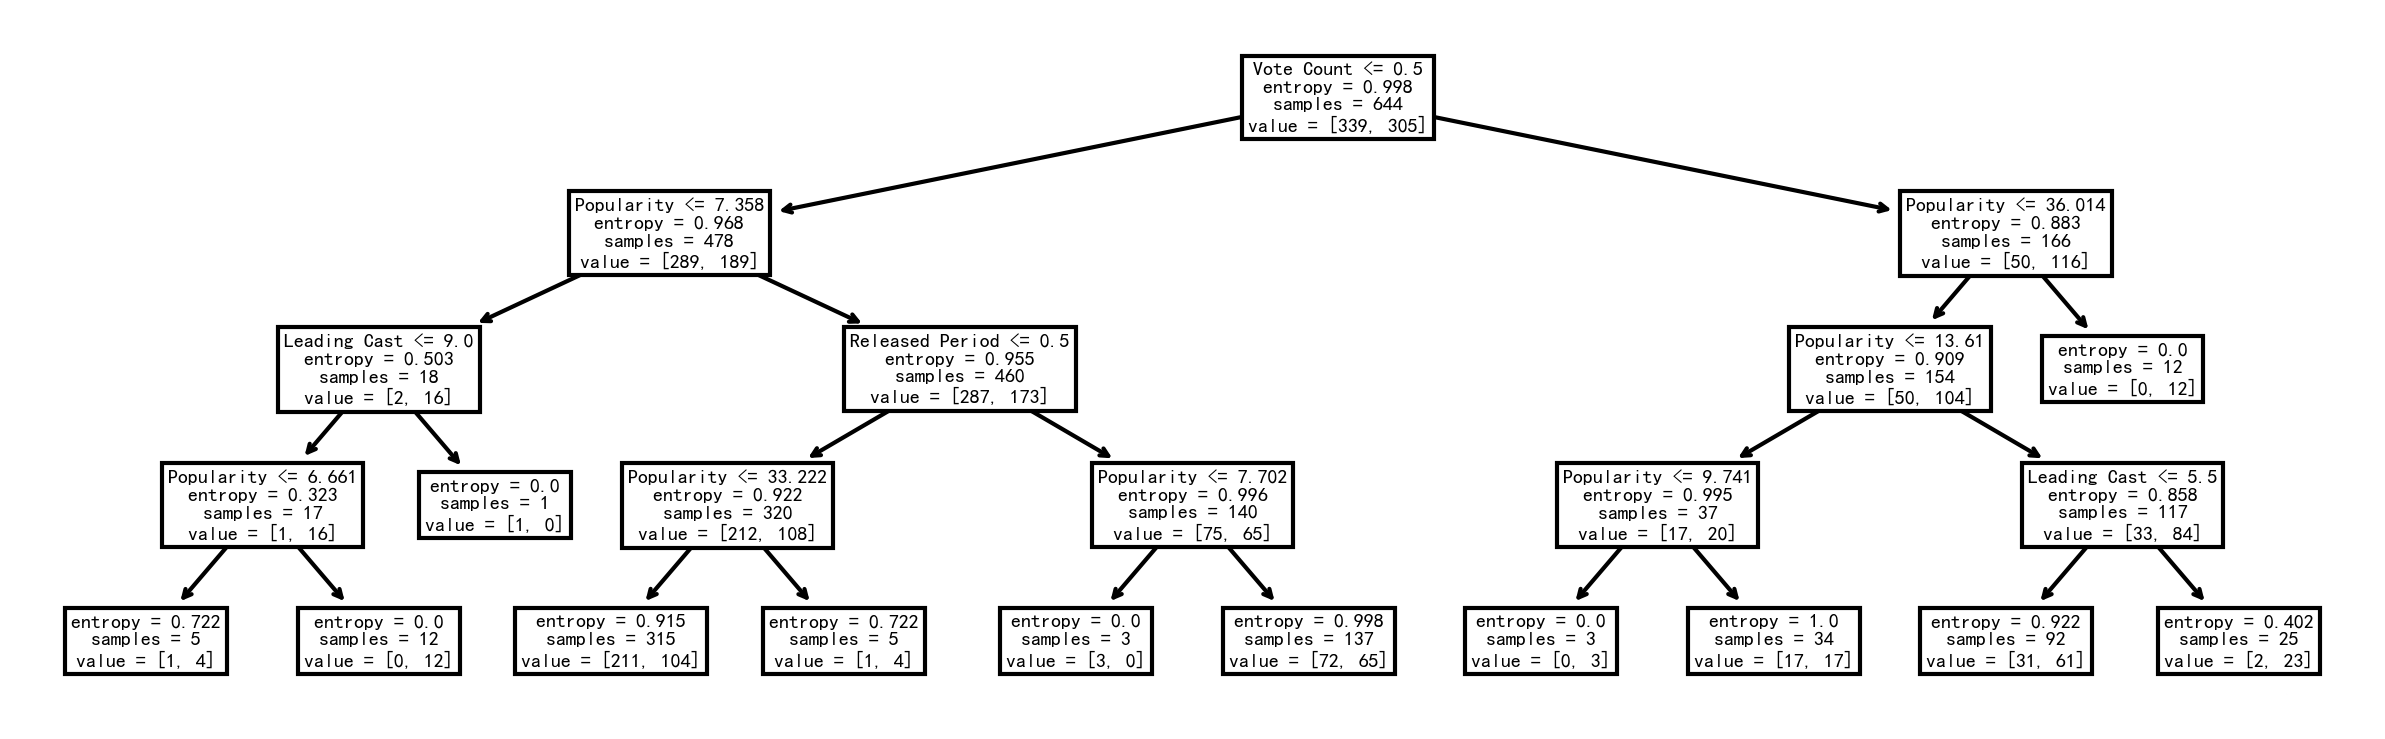

In [98]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = plot_tree(clf, feature_names=['Popularity','Vote Count','Released Period','Leading Cast'])
plt.show()

In [99]:
import pandas as pd
from pandas import DataFrame
from sklearn.cluster import KMeans
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [100]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our',
            'ours', 'ourselves', 'you', 'your', 'yours',
            'yourself', 'yourselves', 'he', 'him', 'his',
            'himself', 'she', 'her', 'hers', 'herself',
            'it', 'its', 'itself', 'they', 'them', 'their',
            'theirs', 'themselves', 'what', 'which', 'who',
            'whom', 'this', 'that', 'these', 'those', 'am',
            'is', 'are', 'was', 'were', 'be', 'been', 'being',
            'have', 'has', 'had', 'having', 'do', 'does', 'did',
            'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
            'because', 'as', 'until', 'while', 'of', 'at',
            'by', 'for', 'with', 'about', 'against', 'between',
            'into', 'through', 'during', 'before', 'after',
            'above', 'below', 'to', 'from', 'up', 'down', 'in',
            'out', 'on', 'off', 'over', 'under', 'again',
            'further', 'then', 'once', 'here', 'there', 'when',
            'where', 'why', 'how', 'all', 'any', 'both', 'each',
            'few', 'more', 'most', 'other', 'some', 'such', 'no',
            'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
            'very', 's', 't', 'can', 'will', 'just', 'don',
            'should', 'now', '', 'nan']

In [101]:
del(dict)

In [102]:
def read_clean_data():
    datafile = 'test2.csv'
    data = pd.read_csv(datafile)  
    data = DataFrame(data)
    print(data.head())
    number = list(data['number'])
    synopses = []
    for temp in data.iterrows():
        tmp = dict(temp[1])
        line = str(tmp['Title']) + ' ' + str(tmp['Released Period']) + ' ' + str(tmp['Type']) +  \
               str(tmp['Leading Cast']) + ' ' + str(tmp['Vote Average']) + ' ' + str(tmp['Overview']) 
        line = line.replace("’", "")
        line = line.replace("'", "")
        line = line.replace("-", " ")  
        line = line.replace("\t", " ")
        line = line.replace("\n", " ")
        line = line.lower()
        line_l = line.split(' ')
        word_list = [word for word in line_l if word not in stop_words]  
        sent = ' '.join(word_list)
        synopses.append(sent)
    return synopses, number

In [103]:
def tokenize_and_stem(text):
    stemmer = SnowballStemmer("english")

    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [104]:
def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [105]:
def tokenization(synopses):
    totalvocab_stemmed = []
    totalvocab_tokenized = []

    for i in synopses:
        allwords_stemmed = tokenize_and_stem(i)  
        totalvocab_stemmed.extend(allwords_stemmed)  
        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)
    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index=totalvocab_stemmed)
    print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')
    return vocab_frame


In [106]:
def tfidf_vactor(synopses):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=20000,
                                       min_df=0.1, stop_words='english',
                                       use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1, 3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)  
    print('matrix shape:', tfidf_matrix.shape)
    terms = tfidf_vectorizer.get_feature_names()  
    print('terms:', terms)
    tfidf_dataframe = pd.DataFrame(tfidf_matrix.toarray())
    return tfidf_dataframe, terms

In [107]:
def K_Mmeans(terms,vocab_frame, matrix):
    num_clusters = 7
    km = KMeans(n_clusters=num_clusters)
    km.fit(matrix)
    clusters = km.labels_.tolist()
    joblib.dump(km, 'doc_cluster.pkl') 
    matrix['clusters'] = clusters
    matrix.columns = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'clusters']
    matrix.to_csv('features.csv')
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]
    for i in range(num_clusters):
        print("Cluster %d words: " % i, end='')
        for ind in order_centroids[i, :6]:  
            print('%s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=', ')
        print()  
        print() 
    return clusters, matrix

In [108]:
def visualized_cluster(dataframe):
    ts = TSNE()
    ts.fit_transform(dataframe)
    ts = pd.DataFrame(ts.embedding_, index=dataframe.index)
    print('ts', ts)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    a = ts[dataframe['clusters'] == 0]
    ax1.scatter(a[0], a[1], c='red', marker='o')
    a = ts[dataframe['clusters'] == 1]
    ax1.scatter(a[0], a[1], c='green', marker='o')
    a = ts[dataframe['clusters'] == 2]
    ax1.scatter(a[0], a[1], c='blue', marker='*')
    a = ts[dataframe['clusters'] == 3]
    ax1.scatter(a[0], a[1], c='black', marker='v')
    a = ts[dataframe['clusters'] == 4]
    ax1.scatter(a[0], a[1], c='gray', marker='+')
    a = ts[dataframe['clusters'] == 5]
    ax1.scatter(a[0], a[1], color='navy', marker='d')
    a = ts[dataframe['clusters'] == 6]
    ax1.scatter(a[0], a[1], color='cyan', marker='H')
    plt.savefig('clusters.png')
    show.plot()
    print(plt.show())

In [109]:
if __name__ == '__main__':
    synopses, number = read_clean_data()
    vocab_frame = tokenization(synopses)
    tfidf_matrix, terms = tfidf_vactor(synopses)
    clusters, frame = K_Mmeans(terms, vocab_frame, tfidf_matrix)
    number_df = pd.DataFrame({'number': number})
    res_df = pd.concat([number_df, frame], axis=1)
    print('cluster class:\n', res_df['clusters'].value_counts())
    print('res_df:\n', res_df.head())
    res_df.to_csv('output.csv')

   number  Popularity  Vote Count                Title  Released Period  Type  \
0       1      13.939         899  Across the Universe               13     1   
1       2      16.389         261    Acts of Vengeance                3     3   
2       3      11.401         637                Adore                7     4   
3       4      31.359        2674                After                1     1   
4       5      10.956         149      After Porn Ends                8     3   

   Leading Cast  Vote Average  \
0             0           7.2   
1             0           5.8   
2             0           6.1   
3             0           6.1   
4             0           5.5   

                                            Overview  
0  When young dockworker Jude leaves Liverpool to...  
1  A fast-talking lawyer transforms his body and ...  
2  Lil and Roz are two lifelong friends, having g...  
3  Tessa Young is a dedicated student, dutiful da...  
4  Documentary examining what happens t

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Tian Shuo/nltk_data'
    - 'D:\\Anaconda\\nltk_data'
    - 'D:\\Anaconda\\share\\nltk_data'
    - 'D:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\Tian Shuo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
